# Анализ данных в авиакомпании

Цель: на основании данных определить самые популярные модели самолетов, выделить топ-10 городов по количеству рейсов

# Оглавление:

1  [Импорт данных](#part_0)

2  [Обзор данных](#part_1)

2.1  [Основные выводы по данным](#part_2)

3  [Исследовательский анализ данных](#part_3)

3.1  [Cessna 208 Caravan](#part_4)

3.2  [SUkhoi Superjet 100](#part_5)

3.3  [Bombardier CRJ-200](#part_6)

3.4  [Airbus и Boeing](#part_7)

4  [Общий вывод](#part_8)


## Импорт данных: <a name="part_0"></a>

In [1]:
from scipy import stats as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_model= pd.read_csv('/datasets/query_1.csv')

In [3]:
df_flights_city = pd.read_csv('/datasets/query_3.csv')

In [4]:
df_model.head()

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300


In [5]:
df_flights_city.sample(5)

,city,average_flights
1,Анадырь,1.000000
100,Ярославль,1.322581
60,Оренбург,5.000000
66,Псков,1.548387
32,Краснодар,3.903226


## Обзор данных: <a name="part_1"></a>

In [6]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [7]:
df_model.describe()

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


In [8]:
df_model.duplicated().sum()

0

In [9]:
df_model.isnull().sum()

model             0
flights_amount    0
dtype: int64

In [10]:
df_flights_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [11]:
df_flights_city.duplicated().sum()

0

In [12]:
df_flights_city.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


In [13]:
df_flights_city.isnull().sum()

city               0
average_flights    0
dtype: int64

### Основные выводы по данным:<a name="part_2"></a>

Все наименования столбцов прописаны строчными буквами, дубликатов нет, пропусков нет. 
Предобработки данных не требуется

## Исследовательский анализ данных: <a name="part_3"></a>

In [14]:
top10_city = df_flights_city.sort_values(by ='average_flights',ascending = False).head(10)

In [15]:
top10_city

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


Выделим топ-10 городов по большему колличеству полетов

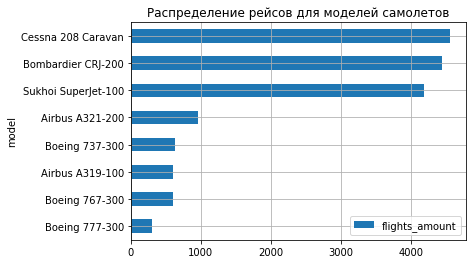

In [16]:
df_model.sort_values(by ='flights_amount',ascending = True ).plot(kind = 'barh', grid=True,x='model',title = 'Распределение рейсов для моделей самолетов')
plt.show()

### Cessna 208 Caravan<a name="part_4"></a>

Лидер по количеству рейсам, всего = 4557.  Предназначен для перевозки грузов и небольшой группы пассажиров (до 13 человек). Используется на авиационных линиях малой длительности. Отсюда так много рейсов, думаю, что если запросить информацию по длительности переездов, возможно, эта модель уступит лидерство.

### SUkhoi Superjet 100<a name="part_5"></a>

Не значительно уступает по колличеству рейсов Cessna 208 Caravan, всего рейсов 4185. Это пассажирский самолет созданный РФ , чтобы сократить зависимость от крупных зарубежных игроков Airbus и Boeing. И хотя Superjet стоит дешевле конкурентов, за рубежом модель не пользуется популярностью и некоторые компании (CityJet)отказались от самолетов и вернули их обратно в Россию. Сейчас в эксплуатации 139 самолетов. 106 из них в России, 33 – за рубежом. не удивительно, что у SUkhoi Superjet 100 такое количество рейсов по РФ

### Bombardier CRJ-200<a name="part_6"></a>

4446 рейсов, большое количество рейсов связано с тем, что в течение 2011 года, в рамках программы обновления и расширения воздушного флота на региональных рейсах и замены устаревших самолетов типа Ту-134, различными компаниями России было куплено около 50 CRJ 200, это обусловлено тем, что ряд западных авиакомпаний вывел самолеты данной модели из своего активного флота. Значительный объем предложения на рынке привел к снижению цен на эти самолеты.

Однако эти самолеты выведены из эксплуатации. И тех.поддержка этих самолетов может обойтись компаниям слишком дорого и повлечет повышение тарифов, после чего снизится покупательную способность.

### Airbus и Boeing<a name="part_7"></a>
Остальные рейсы почти ровно распределены между двумя конкурирующими авиаперевозчиками: Airbus и Boeing

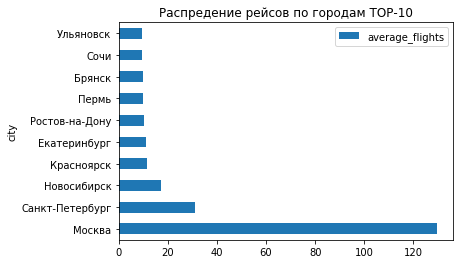

In [17]:
top10_city.plot(kind = 'barh', grid=False,x='city',title = 'Распредение рейсов по городам TOP-10' )

plt.show()

Москва, Санкт-Петербург и Новосибирск крупные города-миллионики, в которых находится больше всего аэропортов, не удивительно, что они оказались в верху списка по количеству совершаемых рейсов в день.
Такой резкий разрыв, почти в 4 раза, Москвы от Санкт-Петербурга и Новосибирска может быть обусловлен какими-либо событиями, например в 2018 год в сентябре проходил первый тур лиги нация УЕФА, либо увеличено число рейсов за счет курортного сезона.
Также за счет курортного сезон в топ-10 городов скорее всего попали такие города как : Сочи, Красноярск,Ульяновск


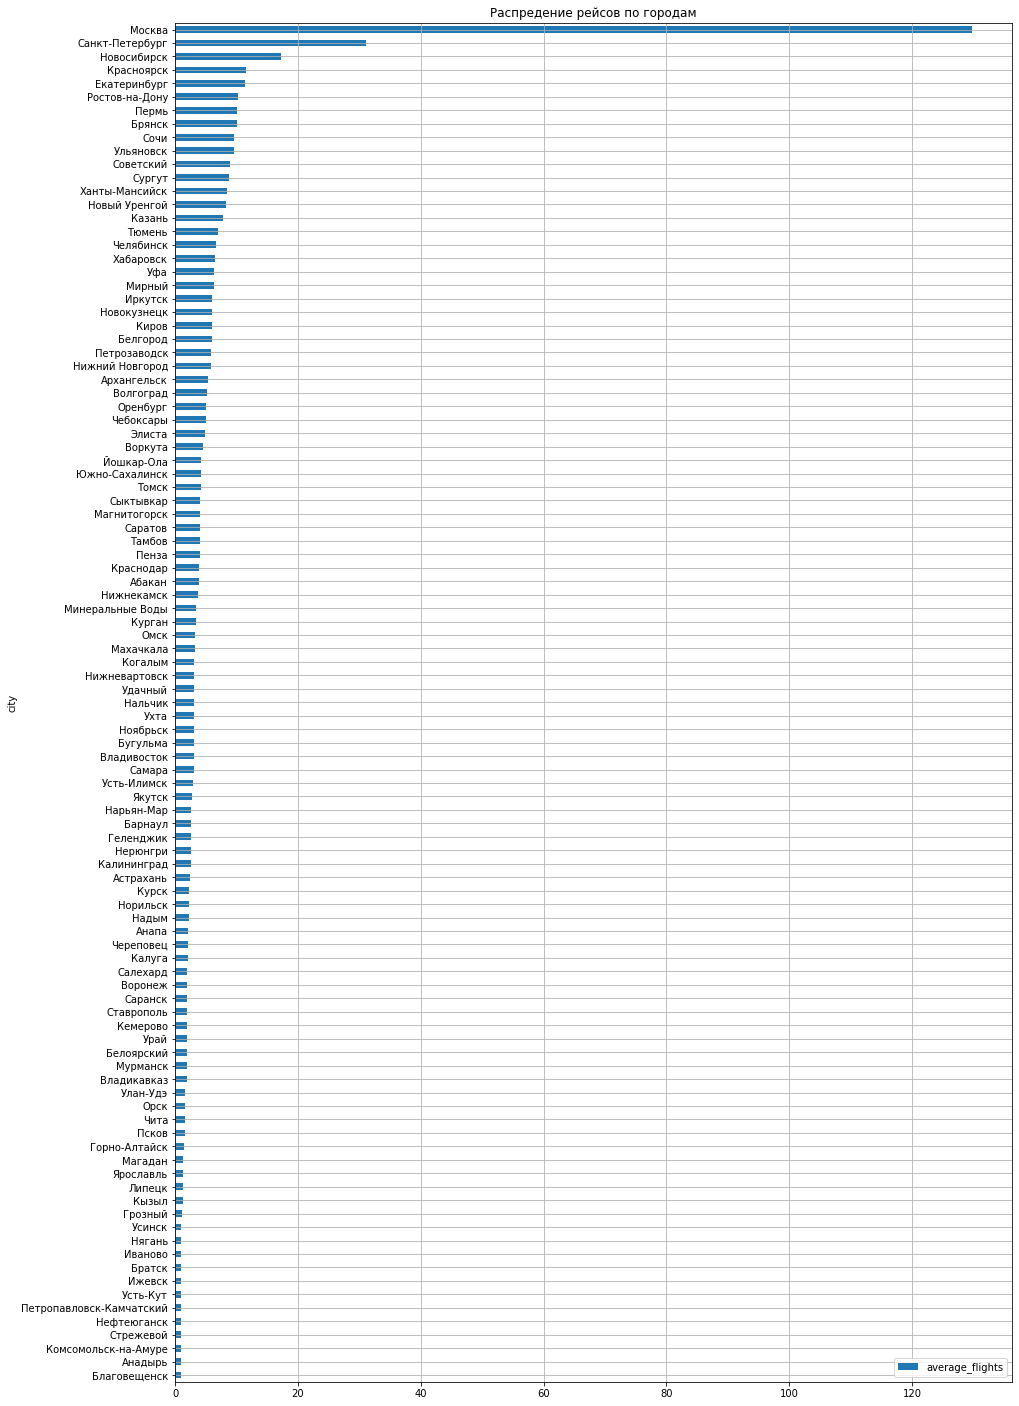

In [18]:
df_flights_city.sort_values(by ='average_flights',ascending = True).plot(kind = 'barh', grid=True, x='city',title = 'Распредение рейсов по городам',figsize = (15,25) )

plt.show()


In [19]:
df_flights_city.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


По остальным городам, не входящих в топ-10, рейсы распределены достаточно ровно, подавляющее большинство ограничивается 2-4 рейсами в день.

## Общий вывод <a name="part_8"></a>

В ходе исследования были изучены исходные данные о моделях самолетах и количестве рейсов в сентябре 2018 года, а так же о городах России и среднем количестве принимаемых ими рейсов в августе 2018 года. Данные не требовали предобработки.

Крупнейшим городами по количеству принимаемых рейсов в августе 2018 года - Москва. Среднее количество рейсов в день составляло ~129.7
В Санкт-Петербурге ~ 31 рейс и в Новосибирске ~ 17, по городам входящих в топ-10 - до 10 рейсов день. По остальным городам, не входящих в топ-10, рейсы распределены достаточно ровно, подавляющее большинство ограничивается 2-4 рейсами в день.

Москва, Санкт-Петербург и Новосибирск крупные города-миллионики, в которых находится больше всего аэропортов, не удивительно, что они оказались в верху списка по количеству совершаемых рейсов в день.
Такой резкий разрыв, почти в 4 раза, Москвы от Санкт-Петербурга и Новосибирска может быть обусловлен какими-либо событиями, например в 2018 год в сентябре проходил первый тур лиги нация УЕФА, либо увеличено число рейсов за счет курортного сезона.
Также за счет курортного сезон в топ-10 городов скорее всего попали такие города как : Сочи, Красноярск, Ульяновск

Лидеры по колличеству рейсов: Cessna 208 Caravan лидер по количеству рейсам, всего = 4557, такое колличесто рейсов обусловлено небольшой длительностью перелетов.

SUkhoi Superjet 100- рейсов 4185. Это пассажирский самолет созданный РФ , чтобы сократить зависимость от крупных зарубежных игроков Airbus и Boeing. И хотя Superjet стоит дешевле конкурентов, за рубежом модель не пользуется популярностью и некоторые компании (CityJet)отказались от самолетов и вернули их обратно в Россию. Сейчас в эксплуатации 139 самолетов. 106 из них в России, 33 – за рубежом. не удивительно, что у SUkhoi Superjet 100 такое количество рейсов по РФ

Bombardier CRJ-200 - 4446 рейсов, большое количество рейсов связано с тем, что в течение 2011 года, в рамках программы обновления и расширения воздушного флота на региональных рейсах и замены устаревших самолетов типа Ту-134, различными компаниями России было куплено около 50 CRJ 200, это обусловлено тем, что ряд западных авиакомпаний вывел самолеты данной модели из своего активного флота. Значительный объем предложения на рынке привел к снижению цен на эти самолеты. Однако эти самолеты выведены из эксплуатации. И тех.поддержка этих самолетов может обойтись компаниям слишком дорого и повлечет повышение тарифов, после чего снизится покупательную способность.

Остальные рейсы почти ровно распределены между двумя конкурирующими авиаперевозчиками: Airbus и Boeing

